# Machine Failure Predictive Analysis

## Data Loading

Pada tahap pertama ini, dataset **ai4i2020.zip** diunduh langsung dari URL yang telah disediakan dan diekstrak di lingkungan Google Colab. Dataset ini berisi data sensor dan log performa mesin, yang akan dianalisis untuk memprediksi potensi kegagalan mesin.

Langkah-langkah yang dilakukan meliputi :
1. **Download Dataset** : Mengunduh file zip yang berisi data
2. **Ekstraksi Data** : Menyimpan file yang diekstrak direktori kerja untuk dapat digunakan dalam proses pra-pemrosesan dan analisis lebih lanjut.
3. **Memuat Dataset kedalam dataframe** : Membaca data dari file hasil ekstraksi kedalam Dataframe menggunakan library Pandas untuk memudahkan manipulasi dan analisis.

In [ ]:
import requests
import zipfile
import os

url = 'https://archive.ics.uci.edu/static/public/601/ai4i+2020+predictive+maintenance+dataset.zip'
zip_filename = 'ai4i2020.zip'

# Download dataset
response = requests.get(url)
with open(zip_filename, 'wb') as f:
    f.write(response.content)

# Extract Zip File
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()
    print('Extracted Successfully!')

Extracted Successfully!


In [ ]:
import pandas as pd

df = pd.read_csv('/content/ai4i2020.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


## Exploratory Data Analysis

Tahap ini bertujuan untuk memahami pola, karakteristik, dan distribusi data yang ada pada dataset *ai4i2020*. Proses EDA dilakukan untuk mengetahui bagaimana setiap fitur berhubungan satu sama lain, dan untuk mengenali fitur-fitur mana yang signifikan dalam memprediksi kegagalan mesin.


### a. Missing Value Identification

Langkah pertama dalam EDA adalah mengecek apakah terdapat *missing value* di dalam dataset. Adanya *missing value* dapat mempengaruhi hasil analisis dan performa model prediksi. Dengan memeriksa persentase dan distribusi *missing value* pada setiap fitur, kita dapat menentukan langkah pengisian atau penghapusan yang diperlukan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
df.shape

(10000, 14)

In [ ]:
df[df['Tool wear [min]'] == 0]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
78,79,L47258,L,298.8,308.9,1398,51.5,0,0,0,0,0,0,0
162,163,L47342,L,298.3,308.1,1586,35.5,0,0,0,0,0,0,0
250,251,L47430,L,298.0,308.3,1662,32.7,0,0,0,0,0,0,0
332,333,M15192,M,297.6,308.3,1538,40.2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9672,9673,H39086,H,299.0,310.2,1744,31.5,0,0,0,0,0,0,0
9759,9760,L56939,L,298.5,309.7,1613,36.7,0,0,0,0,0,0,0
9834,9835,M24694,M,298.3,309.1,1632,32.7,0,0,0,0,0,0,0
9908,9909,L57088,L,298.6,309.0,1456,47.7,0,0,0,0,0,0,0


Terdapat 120 baris data pada variabel Tool wear yang memiliki nilai 0, yang secara logis mengindikasikan bahwa mesin tersebut tidak beroperasi atau tidak digunakan. Untuk memastikan apakah nilai 0 ini merupakan missing value atau outlier, dilakukan beberapa langkah analisis.

1. Verifikasi Kegagalan Mesin. Langkah pertama adalah memastikan bahwa mesin yang tidak digunakan (Tool wear [min] = 0) tidak mengalami kegagalan mesin (Machine Failure). Secara logis, mesin yang tidak digunakan seharusnya tidak mengalami kegagalan.

In [ ]:
df[(df['Tool wear [min]'] == 0) & (df['TWF'] == 1)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF


In [ ]:
df[(df['Tool wear [min]'] == 0) & (df['Machine failure'] == 1)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
5490,5491,L52670,L,302.6,312.1,1288,68.5,0,1,0,0,1,0,0
6678,6679,M21538,M,301.5,310.7,1336,65.6,0,1,0,0,1,0,0
9175,9176,L56355,L,297.8,309.0,1403,64.2,0,1,0,0,1,0,0


Dari data yang ada, ditemukan bahwa 3 dari 120 baris data dengan Tool wear [min] = 0 menunjukkan kegagalan mesin (Machine Failure). Setelah diteliti lebih lanjut, jenis kegagalan ini adalah Power Failure (PWF). Kegagalan daya pada mesin dapat menjelaskan mengapa mesin tidak beroperasi dan tidak menunjukkan adanya penggunaan alat (Tool wear = 0). Dengan demikian, kasus ini masih masuk akal. Namun bagaimana dengan data Tool wear lainnya yang tidak memiliki Machine Failure (Machine failure = 0), apakah hal ini dapat mengonfirmasi bahwa nilai 0 pada variabel Tool wear adalah benar? Maka dari itu dilakukan alternatif selanjutnya:
2. Melakukan analisis hubungan antara variabel Tool wear [min] dengan variabel lain untuk melihat apakah nilai 0 pada Tool wear memiliki pola yang konsisten dengan kondisi logis. Variabel yang dirasa memiliki hubungan dengan Tool wear adalah Rotational Speed [rpm] dan Process temperature [K]. Dimana jika tidak ada pola yang jelas atau konsisten maka akan disimpulkan bahwa nilai 0 adalah data yang tidak akurat. Jika terdapat pola tertentu (misalnya, nilai Tool wear [min] = 0 selalu terjadi saat Rotational Speed sangat rendah), maka akan disimpulkan masuk akal dalam konteks tertentu.

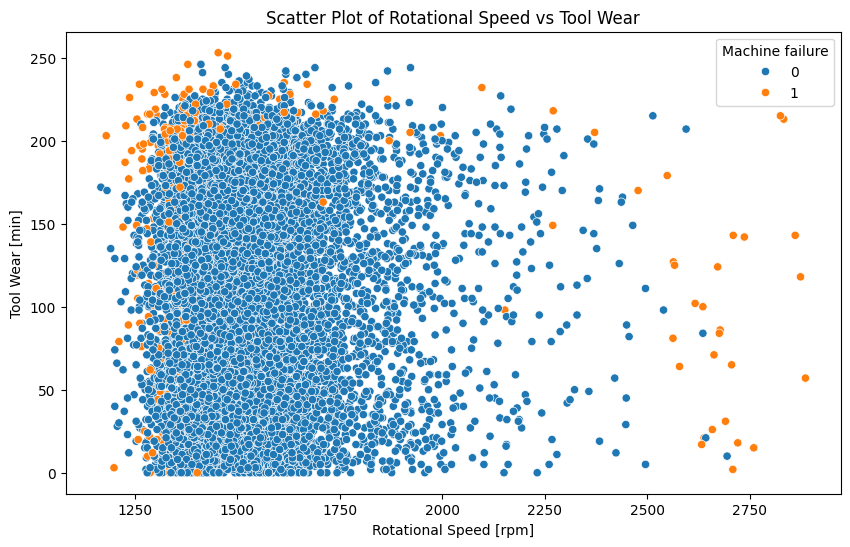

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rotational speed [rpm]', y='Tool wear [min]', hue='Machine failure')
plt.title('Scatter Plot of Rotational Speed vs Tool Wear')
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Tool Wear [min]')
plt.show()

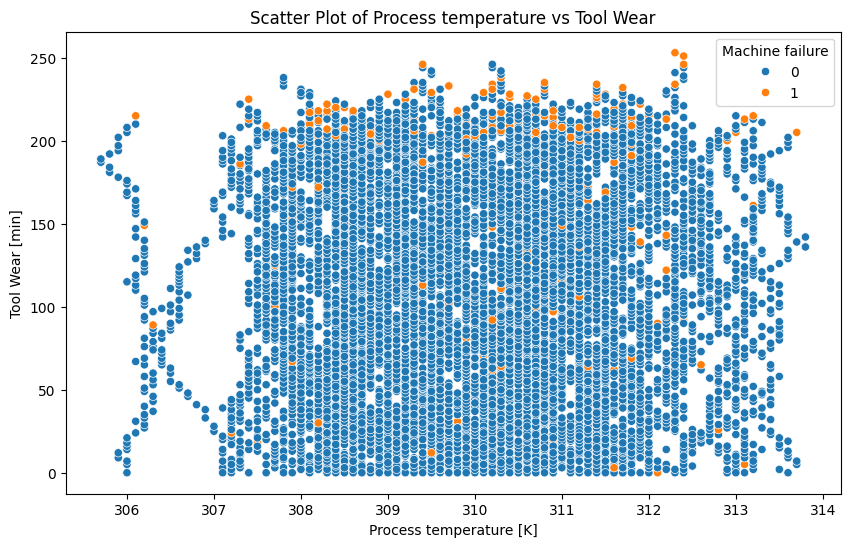

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Process temperature [K]', y='Tool wear [min]', hue='Machine failure')
plt.title('Scatter Plot of Process temperature vs Tool Wear')
plt.xlabel('Process temperature [K]')
plt.ylabel('Tool Wear [min]')
plt.show()

Pada scatter plot diatas, tidak ditemukan pola yang jelas/konsisten tentang hubungan antara variabel Tool wear dengan Rotational Speed maupun dengan variabel Process temperature [K]. Titik-titik yang mewakili nilai antara dua variabel ini tersebar luas sehingga dapat disimpulkan tidak ada korelasi yang kuat antara variabel Tool wear dengan variabel lainnya.

Maka dari itu, nilai 0 pada variabel Tool wear akan dianggap anomali atau missing value. Alasan anggapan ini adalah:
1. Ketidaksesuaian dengan kondisi operasional mesin. Meskipun Tool wear = 0, variabel lain seperti Process temperature dan Rotational Speed menunjukkan nilai yang signifikan. Secara logika, jika mesin menunjukkan suhu proses dan kecepatan rotasi, artinya mesin tersebut beroperasi. Namun, dalam kasus ini, Tool wear menunjukkan nilai 0 menit, yang menunjukkan mesin tidak digunakan. Ini adalah inkonsistensi yang menunjukkan bahwa nilai Tool wear kemungkinan merupakan kesalahan atau data yang tidak valid.

2. Tidak ada korelasi dengan variabel lain. Jika nilai Tool wear = 0 adalah kasus unik, seharusnya ada korelasi linier atau logis dengan variabel lain, seperti kecepatan rotasi atau suhu proses. Namun, scatter plot tidak menunjukkan adanya korelasi yang jelas, yang semakin menguatkan asumsi bahwa nilai ini mungkin merupakan anomali.

3. Memang, sebagian besar data dengan Tool wear = 0 tidak mengalami kegagalan mesin. Mesin yang tidak beroperasi tidak akan mengalami kegagalan, dan ini terlihat pada sebagian besar data yang menunjukkan Tool wear = 0. Namun, kembali pada poin pertama, mesin tersebut menunjukkan aktivitas berdasarkan variabel lain (kecepatan rotasi dan suhu proses), yang seharusnya menunjukkan adanya penggunaan alat.

Sehingga, kesimpulannya 120 data bernilai 0 ini dianggap sebagai missing value

Lalu bagaimana penanganannya?

Langkah yang dipilih adalah menghapus data yang dianggap anomali (yaitu, Tool wear [min] = 0). Daripada menggantikan nilai tersebut dengan median atau mean, menghapus data anomali ini merupakan langkah yang dirasa tepat, karena jumlahnya hanya sekitar 1,2% dari total data (yaitu sekitar 120 dari 10.000 sampel). Penghapusan ini tidak akan memengaruhi analisis secara signifikan, tetapi akan meningkatkan kualitas data.

In [ ]:
df_cleaned = df[df['Tool wear [min]'] != 0]
df_cleaned.shape

(9880, 14)

Sekarang data sampel pada dataset ini berubah dari 10.000 menjadi 9.880 (120 data anomali (missing value) telah dihapus)

### b. Univariate Analysis

Univariate Analysis bertujuan untuk memahami distribusi masing-masing fitur, baik yang bersifat **kategorikal** maupun **numerik**.

#### i. Categorical Features

Pada bagian ini, terdapat dua fitur kategorikal utama:

1. **Type Feature**  
   Fitur ini merepresentasikan tipe mesin yang terlibat dalam dataset. Analisis dilakukan dengan menghitung frekuensi setiap tipe mesin untuk melihat distribusinya dan apakah terdapat tipe mesin tertentu yang lebih sering mengalami kegagalan.

2. **Failure Type Feature**  
   Fitur ini menunjukkan tipe kegagalan mesin dan terdiri dari beberapa jenis kegagalan:
   - **TWF**: Tool Wear Failure
   - **HDF**: Heat Dissipation Failure
   - **PWF**: Power Failure
   - **OSF**: Overstrain Failure
   - **RNF**: Random Failures

Distribusi dari setiap jenis kegagalan dianalisis untuk mengidentifikasi jenis kegagalan yang paling sering terjadi pada mesin. Dengan visualisasi seperti diagram batang, kita dapat melihat proporsi setiap tipe kegagalan dan mempelajari pola yang ada.

In [ ]:
import numpy as np

# Menggabungkan Failure Type yang berbentuk one hot encoding menjadi categorical feature
df_cleaned['Failure Type'] = np.where(
    df_cleaned['Machine failure'] == 1,
    df_cleaned[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].idxmax(axis=1),
    'No Failure')

<ipython-input-12-8dadc9f5179f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Failure Type'] = np.where(


Kode diatas menambah kolom baru yang merepresentasikan Tipe Kegagalan dari bentuk One Hot Encoding menjadi Categorical Feature. Maksud dari kode diatas adalah dengan menambahkan kondisi menggunakan numpy.where, dimana:
1. Jika baris pada data memiliki keadaan Machine failure = 1, maka Failure Type akan diisi dengan tipe kegagalan yang bernilai true pada data yang berbentuk one hot encoding.
2. Jika kondisi false (Machine failure = 0) maka akan diinput nilai 'No Failure' yang berarti tidak terjadi kegagalan pada mesin.

In [ ]:
df_cleaned['Failure Type'].value_counts()

,count
Failure Type,
No Failure,9544
HDF,115
PWF,88
OSF,78
TWF,55


##### Type Feature

      jumlah sampel  persentase
Type                           
L              5931        60.0
M              2963        30.0
H               986        10.0


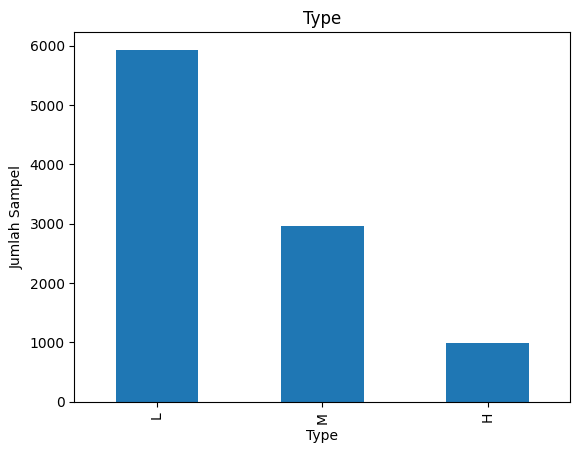

In [ ]:
feature1 = 'Type'
count1 = df_cleaned[feature1].value_counts()
percent = 100*df_cleaned[feature1].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count1, 'persentase':percent.round(1)})
print(df1)

count1.plot(kind='bar', title=feature1)
plt.xlabel(feature1)
plt.ylabel('Jumlah Sampel')
plt.show()

Berdasarkan Countplot diatas, dapat dilihat bahwa tipe mesin yang paling banyak distribusinya adalah tipe L. Berdasarkan data, tipe mesin dibagi menjadi 3 yaitu tipe L, M dan H. Berikut keterangan kode tipe mesin tersebut:
1. Tipe L (Light) adalah Mesin kategori ringan yang biasanya digunakan untuk pekerjaan dengan beban rendah, frekuensi operasi lebih rendah, dan umumnya memiliki durasi operasi yang singkat. Mesin tipe L sering digunakan untuk produksi skala kecil atau operasi yang tidak memerlukan daya besar.

2. Tipe M (Medium) adalah Mesin kategori menengah yang digunakan untuk aplikasi moderate atau pekerjaan dengan beban kerja sedang. Mesin tipe ini biasanya memiliki kemampuan operasi yang lebih lama dan lebih tahan terhadap penggunaan yang lebih sering dibandingkan dengan tipe L. Sering digunakan untuk skala produksi menengah.

3. Tipe H (Heavy) adalah Mesin kategori berat yang didesain untuk aplikasi berat atau intensif, seperti operasi yang membutuhkan daya besar, produksi tinggi, atau penggunaan yang sangat lama. Tipe H biasanya digunakan untuk manufaktur skala besar atau proses industri yang berjalan terus-menerus dalam lingkungan yang keras.

##### Failure Type Feature

              jumlah sampel  persentase
Failure Type                           
No Failure             9544        96.6
HDF                     115         1.2
PWF                      88         0.9
OSF                      78         0.8
TWF                      55         0.6


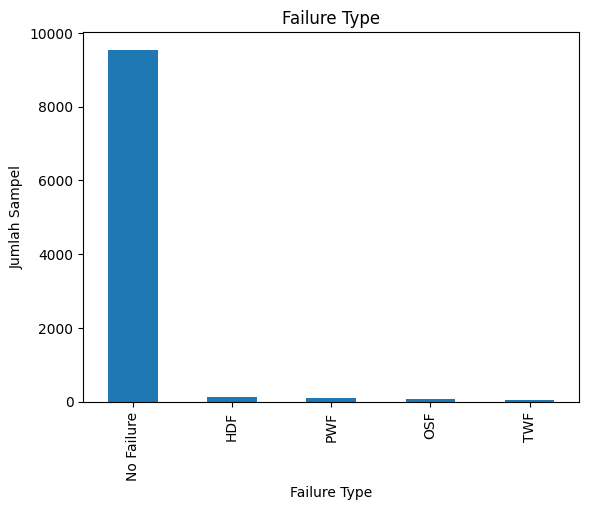

In [ ]:
feature2 = 'Failure Type'
count2 = df_cleaned[feature2].value_counts()
percent = 100*df_cleaned[feature2].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count2, 'persentase':percent.round(1)})
print(df2)

count2.plot(kind='bar', title=feature2)
plt.xlabel(feature2)
plt.ylabel('Jumlah Sampel')
plt.show()

Berdasarkan countplot diatas, 'Failure Type' yang paling banyak distribusinya pada dataset adalah TWF (Tool Wear Failure) dengan distribusi sebesar 97 %. Berikut keterangan dari masing-masing 'Failure Type':
1. TWF (Tool Wear Failure) adalah kegagalan alat karena keausan.
2. HDF (Heat Dissipation Failure) adalah kegagalan karena masalah disipasi panas.
3. PWF (Power Failure) adalah kegagalan yang disebabkan oleh masalah daya.
4. OSF (Overstrain Failure) adalah Kegagalan yang disebabkan oleh tekanan berlebih.
5. RNF (Random Failures) adalah Kegagalan acak yang tidak terklasifikasikan ke dalam kategori kegagalan lainnya.

#### ii. Numerical Features

Analisis dilakukan pada fitur-fitur numerik seperti suhu, tekanan, kecepatan, dan faktor lainnya yang tercatat dalam log performa mesin. Distribusi setiap fitur numerik dianalisis dengan histogram atau boxplot untuk mengidentifikasi apakah terdapat *outliers*, rentang nilai, dan distribusi umum fitur.


In [ ]:
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']

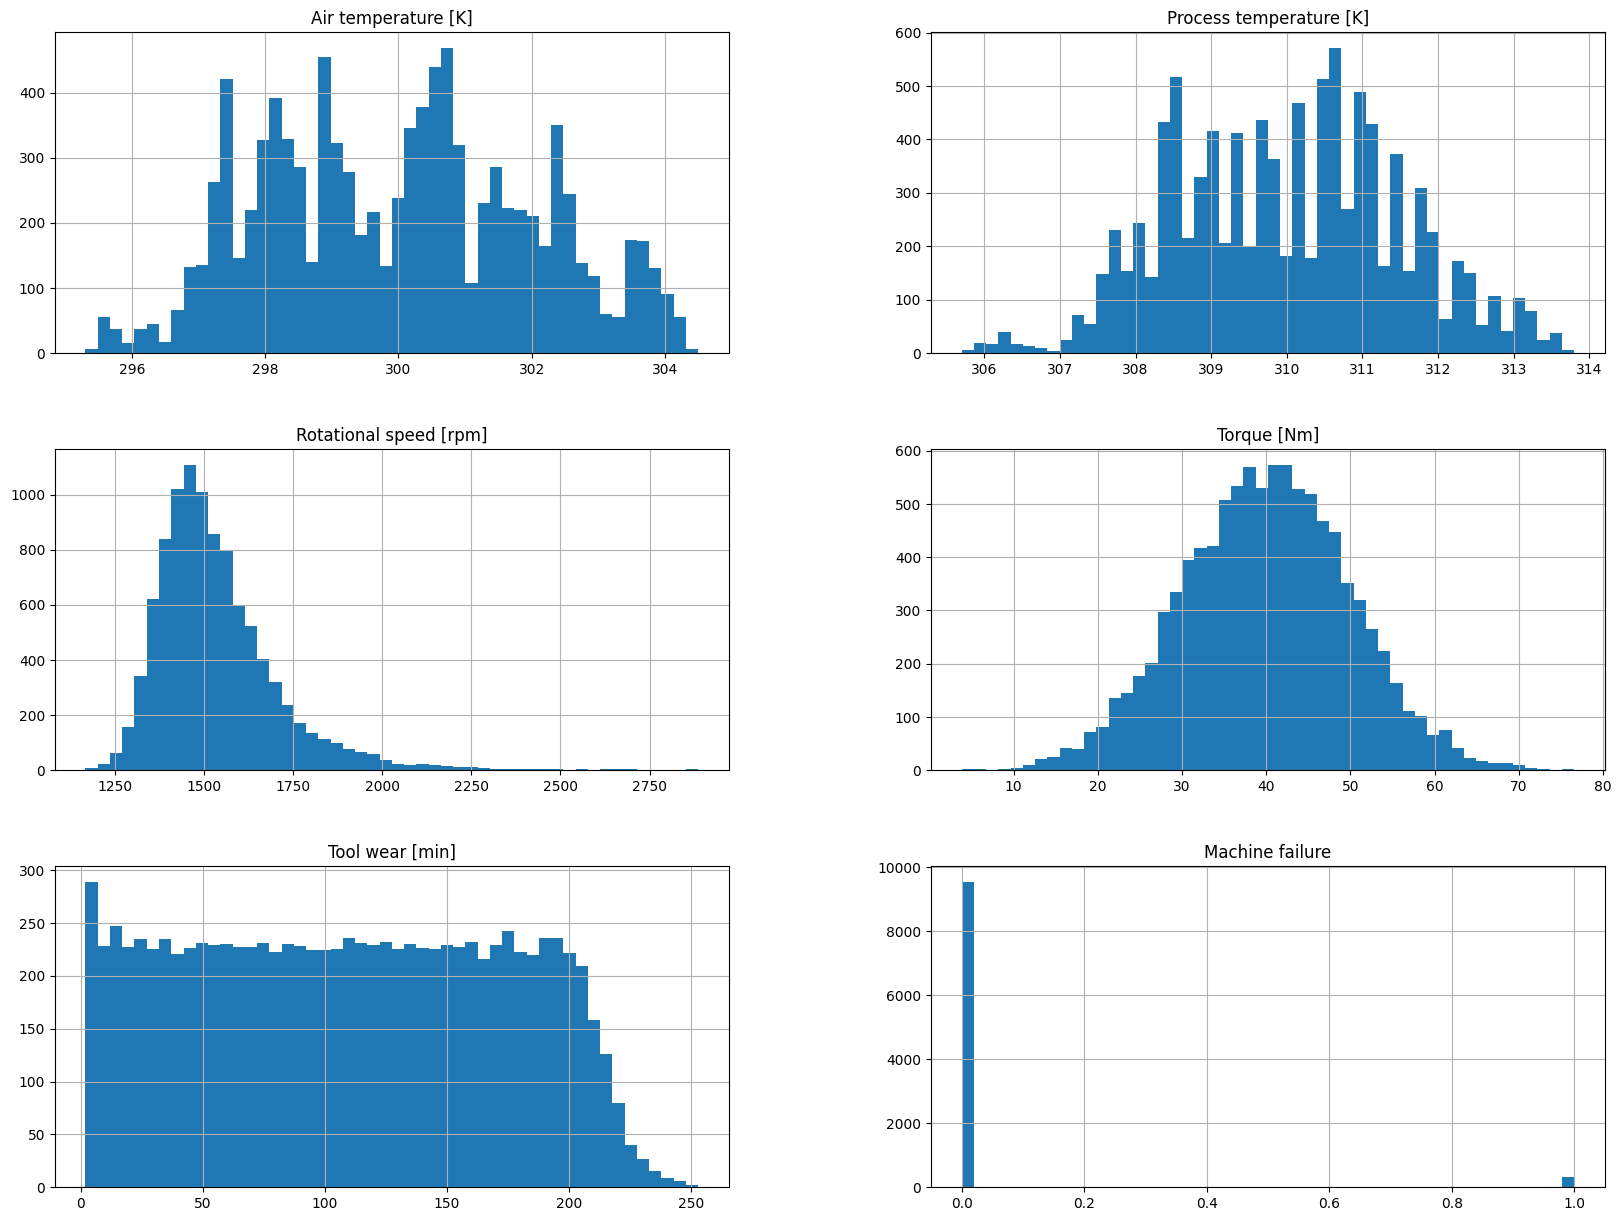

In [ ]:
df_cleaned[numerical_features].hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram "Numerical Features" ini dapat diambil beberapa informasi:
1. Air Temperature. Distribusi air temperature mengindikasikan adanya beberapa kelompok dalam data. Tidak ada pola distribusi yang simetris dan terlihat sedikit tersebar. Nilai rentang suhu udara berkisar antara 294 K hingga 305 K, dengan sebagian besar data terkonsentrasi di sekitar 298–301 K.

2. Process Temperature. Distribusi suhu proses juga memiliki pola distribusi yang tersebar dengan puncak pada sekitar 310 K. Tidak terlihat adanya outlier yang signifikan, dan distribusi ini menunjukkan bahwa sebagian besar mesin beroperasi pada suhu proses yang berada dalam rentang 308–312 K.

3. Rotational Speed. Distribusi kecepatan rotasi sangat condong ke kanan (positively skewed), dengan sebagian besar mesin beroperasi di sekitar 1500 rpm. Ini menunjukkan bahwa ada lebih banyak mesin dengan kecepatan rotasi yang lebih rendah dibandingkan kecepatan rotasi yang lebih tinggi.

4. Torque. Distribusi torque berbentuk normal atau mendekati simetris, dengan puncak sekitar 40 Nm. Hal ini menunjukkan bahwa torsi mesin dalam dataset ini relatif terpusat di sekitar nilai tengah dan sebagian besar mesin bekerja pada kisaran torsi yang seragam.

5. Tool Wear. Distribusi tool wear agak merata hingga mendekati 200 menit, kemudian turun tajam. Ini menunjukkan bahwa waktu pemakaian alat berkisar cukup luas, dan terdapat banyak mesin yang beroperasi dengan waktu pemakaian alat yang lebih rendah hingga menengah. Tidak ada indikasi outlier yang signifikan, meskipun distribusi menurun drastis pada batas waktu pemakaian yang lebih tinggi.

6. Machine Failure. Distribusi biner (0 dan 1), di mana nilai 0 sangat mendominasi. Ini berarti kegagalan mesin jarang terjadi dalam dataset, dan sebagian besar mesin dalam kondisi baik (tidak mengalami kegagalan). Perbandingan jumlah antara kegagalan mesin (1) dan tidak ada kegagalan mesin (0) sangat tidak seimbang

### c. Multivariate Analysis

Pada tahap ini, hubungan antar fitur dalam dataset dianalisis untuk mengidentifikasi korelasi dan pola yang mungkin mendukung prediksi kegagalan mesin. Beberapa saran untuk multivariate analysis yang dapat dilakukan adalah:

1. **Korelasi Antar Fitur Numerik**  
   Membuat *heatmap* korelasi atau menggunakan matriks korelasi antar fitur numerik seperti suhu, tekanan, dan kecepatan. Ini membantu mengidentifikasi fitur mana yang berkaitan erat satu sama lain, yang dapat berguna untuk mengurangi dimensi data atau memilih fitur yang paling relevan dalam model.

2. **Analisis Bivariate antara Categorical dan Numerical Features**  
   - **Boxplot atau Violin Plot**: Untuk setiap tipe mesin (*Type Feature*), visualisasikan distribusi nilai fitur numerik seperti suhu atau kecepatan. Ini dapat membantu melihat apakah ada tipe mesin tertentu yang cenderung memiliki nilai parameter operasional lebih tinggi atau lebih rendah.
   - **Swarm Plot atau Strip Plot**: Untuk setiap tipe kegagalan mesin (*Failure Type Feature*), analisis distribusi fitur numerik. Misalnya, kita dapat melihat apakah kegagalan tipe TWF terjadi pada rentang suhu atau tekanan tertentu, yang dapat membantu dalam mengidentifikasi kondisi yang berisiko.

3. **Pivot Table atau Crosstab Analysis pada Categorical Features**  
   Membuat pivot table atau crosstab untuk melihat jumlah kejadian dari masing-masing tipe kegagalan mesin pada setiap tipe mesin. Ini akan memberikan gambaran mengenai tipe mesin mana yang paling sering mengalami tipe kegagalan tertentu, yang mungkin memberikan wawasan tambahan bagi analisis prediktif.

Dengan multivariate analysis ini, kita bisa mendapatkan gambaran yang lebih menyeluruh mengenai interaksi antar fitur dalam dataset, sehingga proses pemodelan dapat lebih tepat dalam menangkap pola yang relevan untuk prediksi kegagalan mesin.

#### i. Correlation Between Numerical Variables

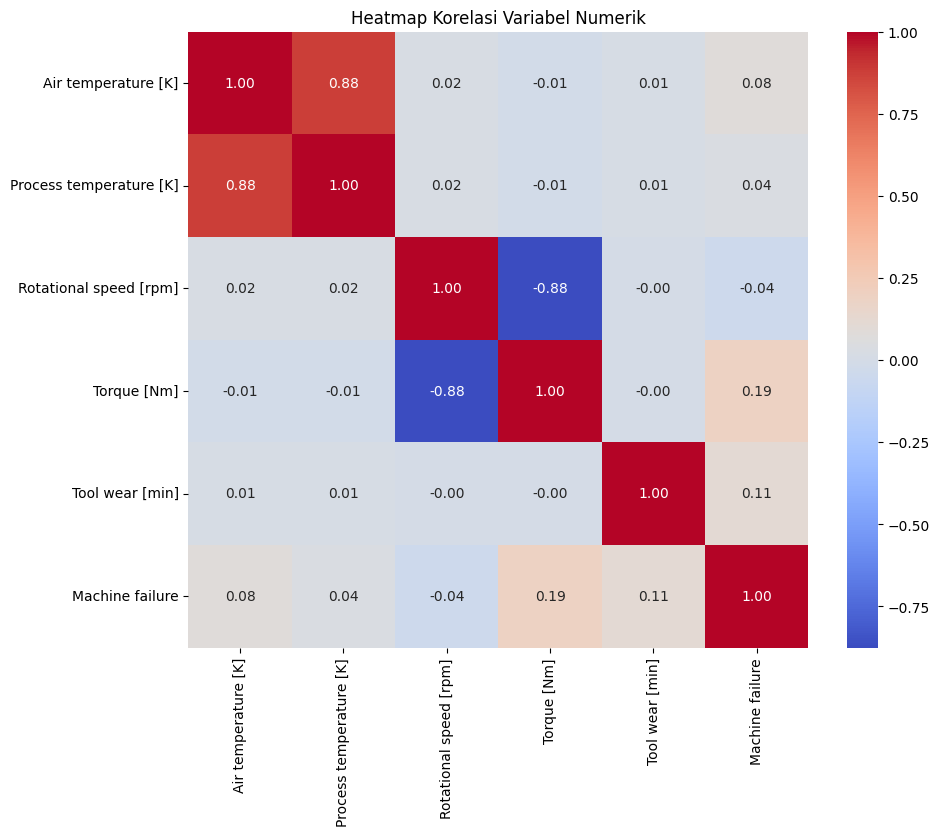

In [ ]:
corr_matrix = df_cleaned[['Air temperature [K]',
                          'Process temperature [K]',
                          'Rotational speed [rpm]',
                          'Torque [Nm]',
                          'Tool wear [min]',
                          'Machine failure']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

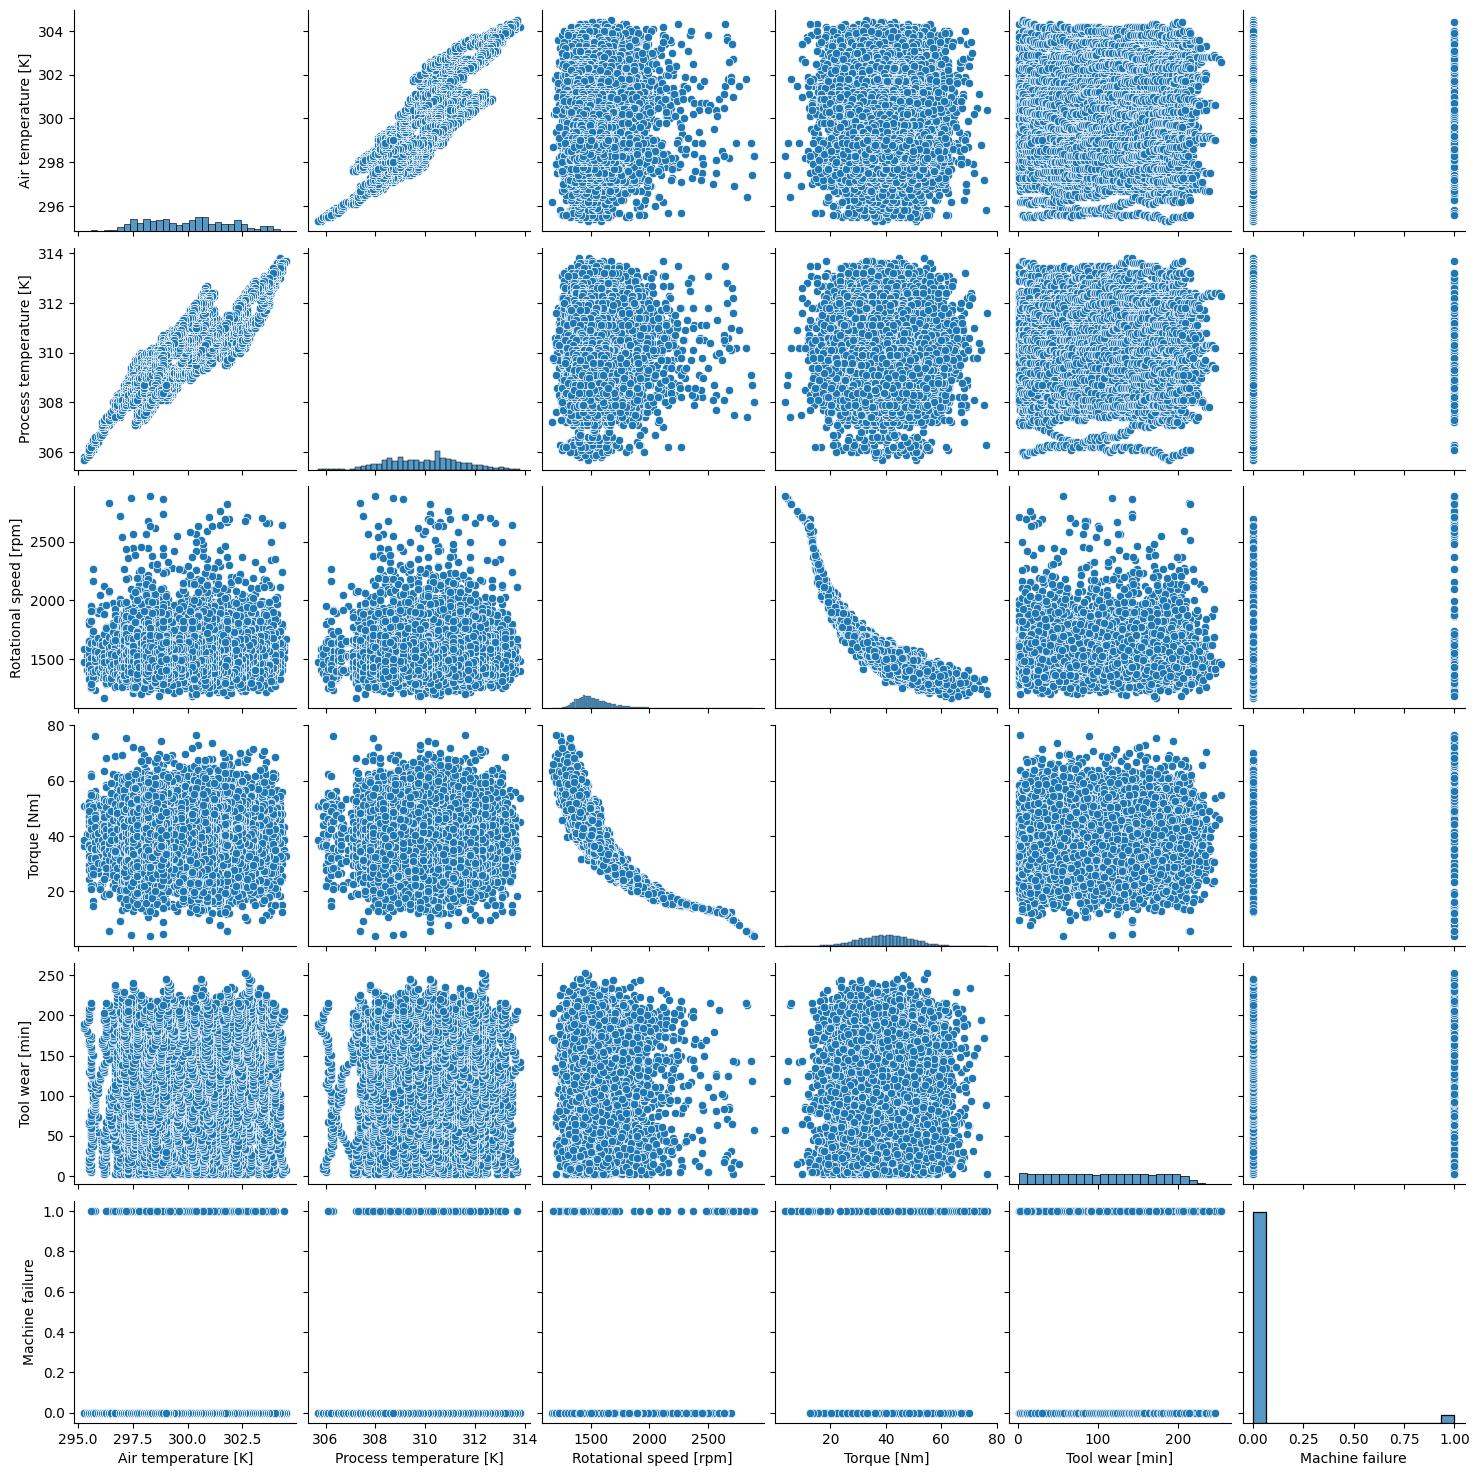

In [ ]:
sns.pairplot(df_cleaned[['Air temperature [K]',
                         'Process temperature [K]',
                         'Rotational speed [rpm]',
                         'Torque [Nm]',
                         'Tool wear [min]',
                         'Machine failure']])
plt.show()

Dari pairplot diatas didapatkan beberapa wawasan dari pola-pola yang muncul pada hubungan antar *numerical features*. Berikut adalah analisis dari setiap fitur dan hubungannya dengan fitur lain dalam pairplot ini :
1. *Air Temperature vs. Process Temperature*.
   Terdapat hubungan linier positif antara Air Temperature dan Process Temperature. Ini menunjukkan bahwa ketika Air Temperature meningkat, Process Temperature juga cenderung meningkat. Hubungan linier ini dapat disebabkan oleh kondisi operasional mesin yang berhubungan erat dengan suhu lingkungan dan suhu proses.

2. *Process Temperature vs. Torque*.
   Pola yang menarik terlihat antara Process Temperature dan Torque, di mana terdapat hubungan kurva non-linier yang cenderung menurun. Hal ini menunjukkan bahwa ketika Process Temperature tinggi, Torque cenderung rendah, dan sebaliknya. Hubungan ini mungkin mengindikasikan bahwa pada suhu proses tertentu, torsi mesin mengalami penurunan atau pembatasan.

3. *Rotational Speed vs. Torque*.
   Terdapat hubungan non-linier yang cukup jelas antara Rotational Speed dan Torque. Secara umum, saat Torque tinggi, Rotational Speed cenderung lebih rendah. Hubungan ini bisa jadi merupakan pola alami pada mesin di mana kenaikan Torque akan menurunkan kecepatan rotasi, yang mungkin merupakan mekanisme untuk mencegah keausan atau kegagalan mesin.

4. *Tool Wear*.
   Tool Wear memiliki distribusi yang lebar dan tidak menunjukkan korelasi yang signifikan dengan fitur numerik lainnya dalam pairplot. Namun, nilai Tool Wear yang tinggi dapat berpengaruh terhadap prediksi kegagalan mesin. Distribusi data Tool Wear yang menyebar menunjukkan bahwa fitur ini bervariasi secara acak, dan mungkin lebih terkait dengan tipe kegagalan tertentu.

5. *Machine Failure*.
   Fitur Machine Failure adalah biner (0 dan 1), dengan mayoritas titik data berada pada nilai 0 (tidak gagal). Hal ini menunjukkan bahwa kegagalan mesin adalah kejadian yang relatif jarang dalam dataset ini. Tidak ada korelasi langsung yang terlihat dalam pairplot antara Machine Failure dan fitur numerik lainnya.

6. *Outliers*.
   Terdapat beberapa outlier, terutama pada fitur Process Temperature dan Torque, yang dapat diamati dari penyebaran data di beberapa pasangan fitur. Outliers ini mungkin menunjukkan kondisi operasi ekstrem yang dapat memengaruhi performa atau meningkatkan risiko kegagalan.

#### ii. Bivariate Analysis of Categorical and Numerical Features



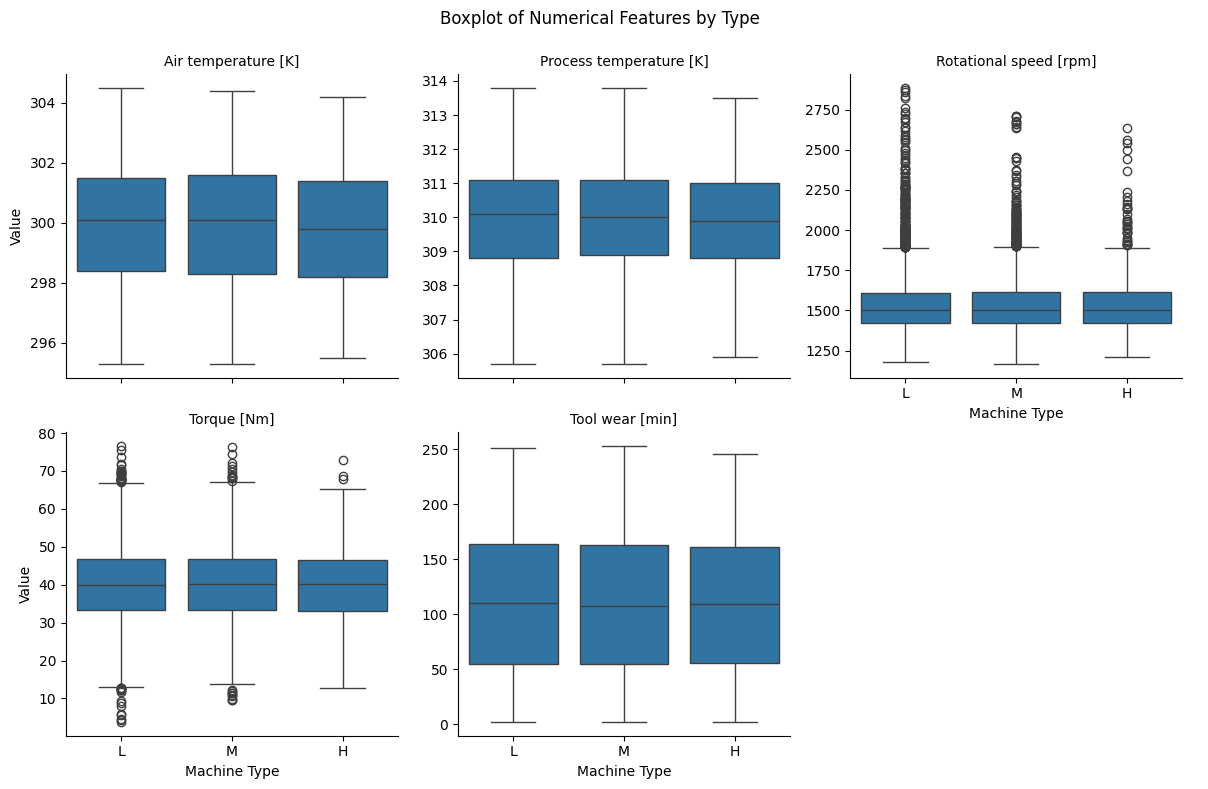

In [ ]:
# Melt dataframe agar fitur numerical menjadi satu kolom
numerical_features = ['Air temperature [K]',
                      'Process temperature [K]',
                      'Rotational speed [rpm]',
                      'Torque [Nm]',
                      'Tool wear [min]']

df_melted = pd.melt(df_cleaned, id_vars=['Type'], value_vars=numerical_features, var_name='Numerical Feature', value_name='Value')

# Membuat grid plot untuk setiap fitur numerikal berdasarkan tipe mesin
g = sns.FacetGrid(df_melted, col="Numerical Feature", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.boxplot, x='Type', y='Value')
g.set_titles("{col_name}")
g.set_axis_labels("Machine Type", "Value")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Boxplot of Numerical Features by Type')
plt.show()

Dari hasil boxplot diatas, berikut beberapa insight yang dapat diambil.
1. Air Temperatur :
   Distribusi suhu udara hampir sama untuk ketiga tipe mesin (L, M, H). Rentang nilai dan median suhu udara sedikit berbeda, tetapi perbedaannya tidak signifikan. Ini menunjukkan bahwa suhu udara konsisten di antara semua tipe mesin dan tidak memiliki perbedaan yang mencolok.

2. Process Temperature :
   Sama seperti suhu udara, distribusi suhu proses juga serupa di antara ketiga tipe mesin. Tidak ada perbedaan yang menonjol dalam median maupun rentang suhu proses antara tipe mesin, sehingga parameter ini mungkin tidak terlalu berpengaruh pada tipe mesin yang digunakan.

3. Rotational Speed :
   Rotational speed menunjukkan lebih banyak outlier dibandingkan fitur lainnya, terutama pada bagian atas dari distribusi. Ini menunjukkan bahwa ada beberapa nilai kecepatan rotasi yang sangat tinggi. Walaupun ketiga tipe mesin memiliki distribusi yang mirip, nilai rotational speed cenderung lebih bervariasi dibandingkan fitur lainnya, dengan beberapa mesin mencapai kecepatan yang lebih tinggi. Perlu diperhatikan outlier pada tipe mesin tertentu, yang mungkin menunjukkan anomali atau potensi kerusakan pada mesin dengan kecepatan tinggi.

4. Torque :
   Torsi memiliki beberapa outlier pada ketiga tipe mesin, namun nilainya tidak terlalu ekstrem seperti pada rotational speed. Median torsi untuk ketiga tipe mesin cukup seragam, dengan distribusi yang sedikit lebih lebar dibandingkan dengan fitur lainnya. Variasi ini menunjukkan bahwa torsi dapat berbeda antar tipe mesin, walaupun mayoritas berada dalam rentang yang sama.

5. Tool Wear :
   Tool wear juga memiliki distribusi yang serupa di antara ketiga tipe mesin, dengan rentang yang cukup lebar tetapi median yang berada pada posisi serupa. Tidak ada perbedaan signifikan antara tipe mesin dalam hal tool wear, yang menunjukkan bahwa keausan alat mungkin tidak terkait langsung dengan tipe mesin, melainkan lebih kepada kondisi operasi yang mungkin seragam di semua tipe mesin.

Secara keseluruhan, tidak ada perbedaan mencolok antara tipe mesin dalam hal air temperature, process temperature, dan tool wear, yang menunjukkan bahwa tipe mesin tidak mempengaruhi nilai dari parameter ini secara signifikan. Namun, pada rotational speed dan torque, terdapat beberapa outlier yang patut diperhatikan, terutama pada rotational speed, yang mungkin menjadi indikasi potensi kerusakan atau variasi dalam performa operasional tertentu.

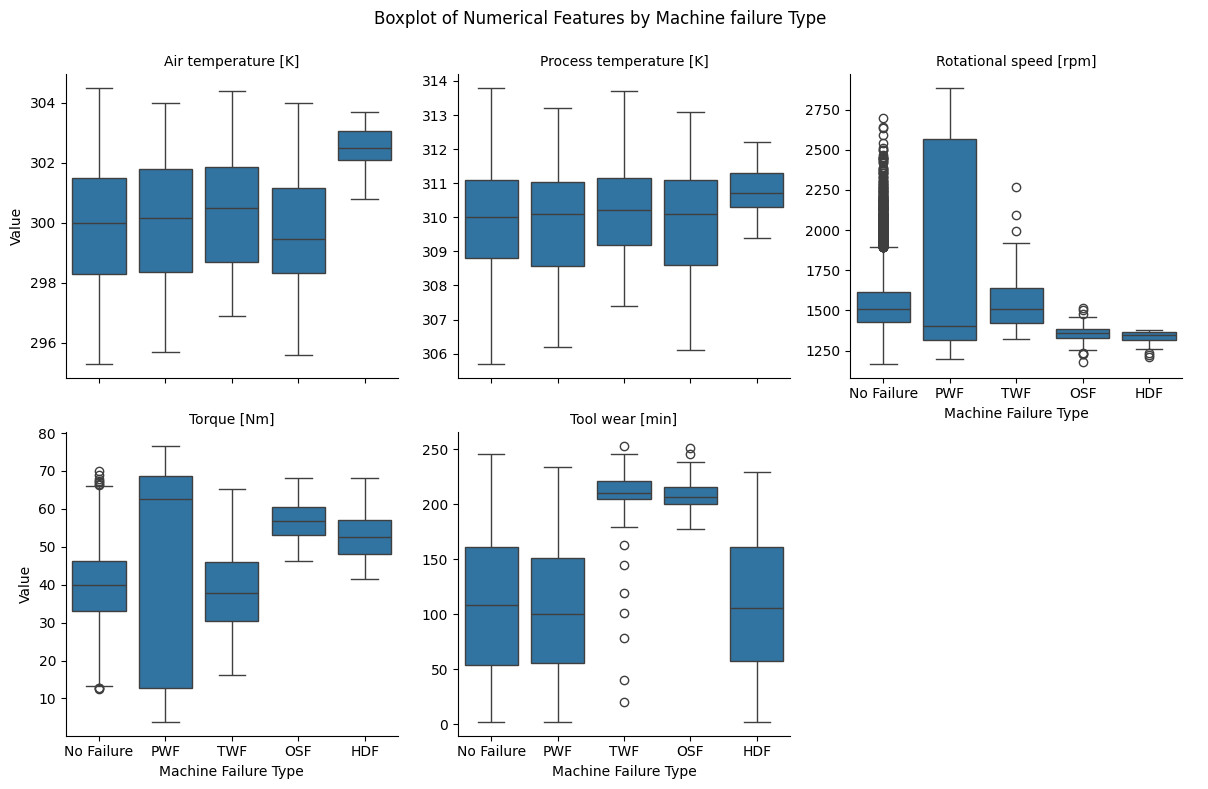

In [ ]:
df_melted2 = pd.melt(df_cleaned, id_vars=['Failure Type'], value_vars=numerical_features, var_name='Numerical Feature', value_name='Value')

# Membuat grid plot untuk setiap fitur numerikal berdasarkan tipe mesin
g = sns.FacetGrid(df_melted2, col="Numerical Feature", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.boxplot, x='Failure Type', y='Value')
g.set_titles("{col_name}")
g.set_axis_labels("Machine Failure Type", "Value")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Boxplot of Numerical Features by Machine failure Type')
plt.show()

Berdasarkan boxplot diatas, dapat diambil hasil analisis sebagai berikut.
1. Air Temperature :
   Tidak ada perbedaan yang signifikan dalam distribusi suhu udara untuk berbagai jenis kegagalan mesin. Ini menunjukkan bahwa suhu udara mungkin tidak memiliki pengaruh besar terhadap jenis kegagalan mesin. Semua jenis kegagalan memiliki rentang suhu yang mirip, dengan nilai median yang juga hampir sama.

2. Process Temperature :
   Seperti pada suhu udara, suhu proses juga menunjukkan distribusi yang mirip untuk semua jenis kegagalan mesin. Tidak ada pola yang jelas antara suhu proses dengan jenis kegagalan tertentu. Hal ini bisa menunjukkan bahwa suhu proses mungkin juga tidak terlalu signifikan dalam memprediksi jenis kegagalan.

3. Rotational Speed :
   Rotational speed (kecepatan rotasi) menunjukkan perbedaan yang lebih jelas antara jenis kegagalan mesin. Untuk kegagalan jenis PWF, terdapat distribusi kecepatan rotasi yang jauh lebih tinggi dibandingkan dengan No Failure dan jenis kegagalan lainnya, dengan rentang yang lebar dan beberapa outlier. Kecepatan rotasi yang lebih rendah terlihat pada kegagalan TWF, OSF, dan HDF dibandingkan dengan PWF dan No Failure. Ini menunjukkan bahwa kecepatan rotasi dapat menjadi fitur yang potensial dalam memprediksi jenis kegagalan tertentu, terutama PWF yang memiliki kecepatan rotasi tinggi.

4. Torque :
   Fitur Torque menunjukkan adanya perbedaan yang cukup signifikan antara PWF dan No Failure. PWF memiliki nilai torsi yang jauh lebih tinggi dibandingkan dengan jenis kegagalan lainnya dan No Failure. Torsi juga dapat menjadi indikator kegagalan tertentu, terutama untuk PWF, karena nilai torsi yang tinggi tampaknya berkaitan dengan kegagalan tersebut.

5. Tool Wear :
   Tool wear (keausan alat) menunjukkan distribusi yang berbeda, terutama untuk kegagalan TWF, OSF, dan HDF, yang memiliki median dan distribusi yang lebih tinggi dibandingkan No Failure dan PWF. Ini menunjukkan bahwa keausan alat mungkin menjadi faktor yang signifikan dalam memprediksi kegagalan TWF, OSF, dan HDF. Outlier yang lebih banyak pada No Failure menunjukkan bahwa ada beberapa kejadian di mana keausan alat tinggi tidak menyebabkan kegagalan mesin, tetapi secara keseluruhan nilai yang lebih tinggi tampaknya berhubungan dengan beberapa jenis kegagalan.

Fitur Rotational Speed, Torque, dan Tool Wear tampak lebih signifikan dalam memisahkan beberapa jenis kegagalan mesin dibandingkan dengan fitur Air Temperature dan Process Temperature. Rotational Speed dapat menjadi fitur utama untuk mengidentifikasi kegagalan PWF. Torque juga berkaitan erat dengan PWF, sedangkan Tool Wear lebih relevan untuk mengidentifikasi TWF, OSF, dan HDF.

In [ ]:
df_cleaned['Failure Type'].value_counts()

,count
Failure Type,
No Failure,9544
HDF,115
PWF,88
OSF,78
TWF,55


Dapat diketahui bahwa pada distribusi data berdasarkan tipe failure nya, distribusi kelas Machine Failure sangat tidak seimbang, dengan proporsi No Failure jauh lebih tinggi dibandingkan kelas-kelas kegagalan mesin lainnya. Terdapat total 9544 sampel No Failure dan hanya 336 sampel Failure yang terdiri dari empat jenis kegagalan: Heat Dissipation Failure (HDF), Power Failure (PWF), Overstrain Failure (OSF), dan Tool Wear Failure (TWF). Ketidakseimbangan data ini menjadi tantangan dalam membangun model klasifikasi yang efektif karena model cenderung bias terhadap kelas mayoritas (No Failure). Oleh karena itu, akan digunakan pendekatan dua tahap untuk mengatasi masalah ini.

Tahap pertama bertujuan untuk mendeteksi apakah suatu kondisi mesin merupakan anomali, yang berarti apakah terdapat kegagalan pada mesin atau tidak (Failure vs. No Failure). Dengan melakukan tahap ini, dapat diidentifikasi kemungkinan kegagalan secara umum tanpa perlu langsung mengklasifikasikan jenis kegagalannya. Tahap ini penting untuk menyaring sampel yang diduga mengalami kegagalan sebelum melanjutkan ke tahap klasifikasi jenis kegagalan, sehingga dapat meningkatkan efisiensi model di tahap berikutnya.

Setelah deteksi anomali pada tahap pertama, data yang teridentifikasi sebagai Failure kemudian digunakan untuk klasifikasi jenis kegagalan. Tahap kedua ini bertujuan untuk membedakan jenis kegagalan mesin secara spesifik di antara kelas-kelas HDF, PWF, OSF, dan TWF.

## Data Preparation

Pada tahap ini, data mengalami beberapa proses persiapan untuk memastikan kualitasnya, memfasilitasi analisis yang lebih baik, dan meningkatkan kinerja model. Tahapan yang dilakukan dalam data preparation ini meliputi :

1. One-Hot Encoding untuk Fitur Kategorikal.
   Beberapa fitur kategorikal seperti Type (tipe mesin) dan Failure Type (jenis kegagalan) diubah menjadi fitur numerik melalui proses one-hot encoding. Teknik ini menghasilkan kolom baru untuk setiap kategori dalam fitur tersebut, dengan nilai biner yang menunjukkan keberadaan kategori dalam setiap observasi. Proses ini memudahkan model dalam memahami kategori yang ada tanpa harus mengurutkan nilai atau memberikan bobot yang tidak diinginkan. Kolom-kolom yang dihasilkan dari one-hot encoding pada Failure Type mencakup jenis kegagalan spesifik.

2. Standarisasi Fitur Numerik.
   Untuk fitur numerik, dilakukan proses standarisasi agar setiap fitur memiliki mean 0 dan standard deviation 1. Langkah ini penting karena skala data yang berbeda dapat menyebabkan bias pada model. Beberapa fitur numerik yang distandarisasi meliputi: suhu, tekanan, kecepatan rotasi, dan kelembaban.

3. Pembuatan Target Untuk Tahap Pertama (Deteksi Anomali).
   Mengingat bahwa distribusi data sangat imbalanced dengan mayoritas data berlabel "No Failure," proyek ini dipecah menjadi dua tahap. Pada tahap pertama, dilakukan klasifikasi binary untuk mendeteksi anomali. Tahap ini membantu model memisahkan kejadian kegagalan dari operasional normal secara umum.

4. Pemisahan Data untuk Pelatihan dan Pengujian
   Setelah preprocessing selesai, data dibagi menjadi training dan testing set dengan rasio tertentu. Langkah ini memastikan bahwa model dapat dievaluasi pada data yang tidak terlihat saat pelatihan, memberikan indikasi yang lebih baik mengenai kinerja di dunia nyata.

In [ ]:
# Mengubah fitur kategorikal kedalam bentuk one hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Type', 'Failure Type'])
df_encoded.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,...,OSF,RNF,Type_H,Type_L,Type_M,Failure Type_HDF,Failure Type_No Failure,Failure Type_OSF,Failure Type_PWF,Failure Type_TWF
1,2,L47181,298.2,308.7,1408,46.3,3,0,0,0,...,0,0,False,True,False,False,True,False,False,False
2,3,L47182,298.1,308.5,1498,49.4,5,0,0,0,...,0,0,False,True,False,False,True,False,False,False
3,4,L47183,298.2,308.6,1433,39.5,7,0,0,0,...,0,0,False,True,False,False,True,False,False,False
4,5,L47184,298.2,308.7,1408,40.0,9,0,0,0,...,0,0,False,True,False,False,True,False,False,False
5,6,M14865,298.1,308.6,1425,41.9,11,0,0,0,...,0,0,False,False,True,False,True,False,False,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9880 entries, 1 to 9999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      9880 non-null   int64  
 1   Product ID               9880 non-null   object 
 2   Air temperature [K]      9880 non-null   float64
 3   Process temperature [K]  9880 non-null   float64
 4   Rotational speed [rpm]   9880 non-null   int64  
 5   Torque [Nm]              9880 non-null   float64
 6   Tool wear [min]          9880 non-null   int64  
 7   Machine failure          9880 non-null   int64  
 8   TWF                      9880 non-null   int64  
 9   HDF                      9880 non-null   int64  
 10  PWF                      9880 non-null   int64  
 11  OSF                      9880 non-null   int64  
 12  RNF                      9880 non-null   int64  
 13  Type_H                   9880 non-null   bool   
 14  Type_L                   9880

In [ ]:
drop_columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
df_for_anomaly = df_encoded.drop(columns=drop_columns)
df_for_anomaly.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M,Failure Type_HDF,Failure Type_No Failure,Failure Type_OSF,Failure Type_PWF,Failure Type_TWF
1,2,L47181,298.2,308.7,1408,46.3,3,0,False,True,False,False,True,False,False,False
2,3,L47182,298.1,308.5,1498,49.4,5,0,False,True,False,False,True,False,False,False
3,4,L47183,298.2,308.6,1433,39.5,7,0,False,True,False,False,True,False,False,False
4,5,L47184,298.2,308.7,1408,40.0,9,0,False,True,False,False,True,False,False,False
5,6,M14865,298.1,308.6,1425,41.9,11,0,False,False,True,False,True,False,False,False


In [ ]:
boelan_columns = df_for_anomaly.select_dtypes(include=['bool']).columns
df_for_anomaly[boelan_columns] = df_for_anomaly[boelan_columns].astype(int)
df_for_anomaly

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M,Failure Type_HDF,Failure Type_No Failure,Failure Type_OSF,Failure Type_PWF,Failure Type_TWF
1,2,L47181,298.2,308.7,1408,46.3,3,0,0,1,0,0,1,0,0,0
2,3,L47182,298.1,308.5,1498,49.4,5,0,0,1,0,0,1,0,0,0
3,4,L47183,298.2,308.6,1433,39.5,7,0,0,1,0,0,1,0,0,0
4,5,L47184,298.2,308.7,1408,40.0,9,0,0,1,0,0,1,0,0,0
5,6,M14865,298.1,308.6,1425,41.9,11,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,298.8,308.4,1604,29.5,14,0,0,0,1,0,1,0,0,0
9996,9997,H39410,298.9,308.4,1632,31.8,17,0,1,0,0,0,1,0,0,0
9997,9998,M24857,299.0,308.6,1645,33.4,22,0,0,0,1,0,1,0,0,0
9998,9999,H39412,299.0,308.7,1408,48.5,25,0,1,0,0,0,1,0,0,0


In [ ]:
# Standarisasi value fitur numerik
from sklearn.preprocessing import StandardScaler

numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
scaler = StandardScaler()

df_for_anomaly[numerical_features] = scaler.fit_transform(df_for_anomaly[numerical_features])
df_for_anomaly.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M,Failure Type_HDF,Failure Type_No Failure,Failure Type_OSF,Failure Type_PWF,Failure Type_TWF
1,2,L47181,-0.902753,-0.880452,-0.729202,0.633584,-1.689172,0,0,1,0,0,1,0,0,0
2,3,L47182,-0.952753,-1.015267,-0.228011,0.944298,-1.657380,0,0,1,0,0,1,0,0,0
3,4,L47183,-0.902753,-0.947860,-0.589982,-0.047982,-1.625587,0,0,1,0,0,1,0,0,0
4,5,L47184,-0.902753,-0.880452,-0.729202,0.002133,-1.593795,0,0,1,0,0,1,0,0,0
5,6,M14865,-0.952753,-0.947860,-0.634533,0.192571,-1.562002,0,0,0,1,0,1,0,0,0


In [ ]:
# Menghapus fitur yang tidak diperlukan untuk model nantinya
df_for_anomaly = df_for_anomaly.drop(columns=['UDI', 'Product ID'])
df_for_anomaly.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M,Failure Type_HDF,Failure Type_No Failure,Failure Type_OSF,Failure Type_PWF,Failure Type_TWF
1,-0.902753,-0.880452,-0.729202,0.633584,-1.689172,0,0,1,0,0,1,0,0,0
2,-0.952753,-1.015267,-0.228011,0.944298,-1.657380,0,0,1,0,0,1,0,0,0
3,-0.902753,-0.947860,-0.589982,-0.047982,-1.625587,0,0,1,0,0,1,0,0,0
4,-0.902753,-0.880452,-0.729202,0.002133,-1.593795,0,0,1,0,0,1,0,0,0
5,-0.952753,-0.947860,-0.634533,0.192571,-1.562002,0,0,0,1,0,1,0,0,0


In [ ]:
# Memisahkan fitur dan target untuk tahap 1 (anomaly detection)
x_anomaly = df_for_anomaly.drop(columns=['Machine failure', 'Failure Type_HDF', 'Failure Type_No Failure', 'Failure Type_OSF', 'Failure Type_PWF', 'Failure Type_TWF'])
y_anomaly = df_for_anomaly['Machine failure']

In [ ]:
x_anomaly

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
1,-0.902753,-0.880452,-0.729202,0.633584,-1.689172,0,1,0
2,-0.952753,-1.015267,-0.228011,0.944298,-1.657380,0,1,0
3,-0.902753,-0.947860,-0.589982,-0.047982,-1.625587,0,1,0
4,-0.902753,-0.880452,-0.729202,0.002133,-1.593795,0,1,0
5,-0.952753,-0.947860,-0.634533,0.192571,-1.562002,0,0,1
...,...,...,...,...,...,...,...,...
9995,-0.602755,-1.082675,0.362281,-1.050285,-1.514313,0,0,1
9996,-0.552755,-1.082675,0.518207,-0.819755,-1.466624,1,0,0
9997,-0.502755,-0.947860,0.590601,-0.659387,-1.387143,0,0,1
9998,-0.502755,-0.880452,-0.729202,0.854091,-1.339454,1,0,0


In [ ]:
y_anomaly

,Machine failure
1,0
2,0
3,0
4,0
5,0
...,...
9995,0
9996,0
9997,0
9998,0


In [ ]:
# Membagi data untuk training dan testing (binary classifaction)
from sklearn.model_selection import train_test_split

x_train_anomaly, x_test_anomaly, y_train_anomaly, y_test_anomaly = train_test_split(x_anomaly, y_anomaly, test_size=0.2, random_state=42, stratify=y_anomaly)

## Modelling (Anomaly Detection)

Pada tahap modelling pertama ini, dilakukan pemodelan anomaly detection untuk mengidentifikasi apakah mesin mengalami kegagalan atau tidak. Untuk menangani masalah ketidakseimbangan distribusi kelas antara mesin yang tidak gagal dan yang gagal, digunakan pendekatan binary classification dengan model Random Forest yang dilatih dengan pembobotan kelas (class_weight='balanced'). Pembobotan kelas ini memastikan bahwa model memberikan perhatian lebih pada kelas yang jarang (mesin yang gagal) tanpa memerlukan teknik sampling yang dapat menghasilkan data sintetis yang mungkin tidak relevan. Model ini kemudian dievaluasi dengan menggunakan metrik klasifikasi, seperti classification report dan confusion matrix, untuk mengukur performa dalam memisahkan mesin yang gagal dari mesin yang tidak gagal.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_anomaly = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_anomaly.fit(x_train_anomaly, y_train_anomaly)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Evaluasi Model
y_pred_anomaly = rf_anomaly.predict(x_test_anomaly)
print('Classification report for Anomaly Detection (Binary Classification) :')
print(classification_report(y_test_anomaly, y_pred_anomaly))
print('\nConfusion Matrix :')
print(confusion_matrix(y_test_anomaly, y_pred_anomaly))

Classification report for Anomaly Detection (Binary Classification) :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1909
           1       1.00      0.42      0.59        67

    accuracy                           0.98      1976
   macro avg       0.99      0.71      0.79      1976
weighted avg       0.98      0.98      0.98      1976


Confusion Matrix :
[[1909    0]
 [  39   28]]


Dari hasil classification report dapat diperoleh :

1. Precision dan Recall.
Kelas 0 (tidak gagal) memiliki precision dan recall yang sangat tinggi (precision 0.98 dan recall 1.00). Ini menunjukkan bahwa model sangat baik dalam mengenali mesin yang tidak gagal. Kelas 1 (gagal) memiliki precision yang sangat tinggi (1.00), tetapi recall yang rendah (0.42). Ini berarti meskipun model jarang salah memprediksi kegagalan mesin (precision tinggi), ada cukup banyak kasus kegagalan yang tidak terdeteksi (recall rendah).

2. Accuracy.
Akurasi keseluruhan mencapai 0.98 atau 98%, yang pada pandangan pertama tampak sangat tinggi. Namun, karena distribusi data yang sangat tidak seimbang, akurasi tinggi ini lebih merefleksikan keberhasilan model dalam memprediksi kelas mayoritas (0 - tidak gagal).

3. Confusion Matrix
Dari confusion matrix, terlihat bahwa model berhasil mengklasifikasikan semua 1.909 sampel dari kelas 0 dengan benar. Namun, dari 67 sampel di kelas 1, hanya 28 yang terdeteksi dengan benar sebagai kegagalan, sementara 39 sampel salah diklasifikasikan sebagai tidak gagal.


Model mampu mengidentifikasi mesin yang tidak gagal dengan sangat baik, tetapi mengalami kesulitan dalam mendeteksi kegagalan (anomaly) secara konsisten. Ini wajar dalam situasi data yang sangat tidak seimbang. Recall yang rendah pada kelas 1 menunjukkan bahwa model sering kali gagal mendeteksi beberapa kasus kegagalan. Oleh karena itu langkah selanjutnya yang diambil adalah memanfaatkan metrik evaluasi yang lebih seimbang yaitu AUC-ROC (Area Under the Curve - Receiver Operating Characteristic). ROC adalah Grafik yang memplot True Positive Rate (TPR) terhadap False Positive Rate (FPR) untuk berbagai nilai threshold. TPR juga dikenal sebagai recall, dan FPR menunjukkan proporsi negatif yang salah diklasifikasikan sebagai positif. Sedangkan AUC adalah luas di bawah ROC Curve yang menunjukkan seberapa baik model dapat membedakan antara dua kelas. Nilai AUC berkisar dari 0.5 hingga 1, di mana 0.5 menunjukkan model acak dan 1 menunjukkan model sempurna.

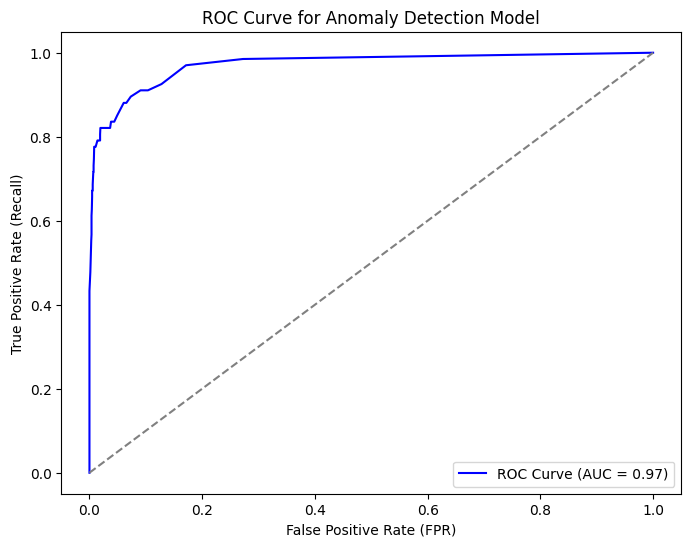

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Mengambil probabilitas prediksi untuk kelas positif (gagal)
y_pred_proba_anomaly = rf_anomaly.predict_proba(x_test_anomaly)[:, 1]

# Menghitung nilai AUC
auc_score = roc_auc_score(y_test_anomaly, y_pred_proba_anomaly)

# Menghitung nilai ROC
fpr, tpr, thresholds = roc_curve(y_test_anomaly, y_pred_proba_anomaly)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Anomaly Detection Model")
plt.legend()
plt.show()

In [ ]:
auc_score

0.971431475414963

Dari metrik evaluasi diatas, dapat disimpulkan :

AUC sebesar 0.97 menunjukkan model mampu mendeteksi kegagalan (anomali) dengan akurasi yang tinggi pada berbagai threshold, tanpa terlalu banyak menghasilkan false positives. Dengan kata lain, model efektif dalam mendeteksi kegagalan mesin, yang merupakan tujuan utama dari anomaly detection pada proyek ini.

Garis ROC yang mendekati sudut kiri atas menunjukkan bahwa model mencapai tingkat True Positive Rate (Recall) yang tinggi dengan False Positive Rate yang rendah. Ini mengindikasikan bahwa model sangat sensitif terhadap kegagalan tanpa mengorbankan akurasi pada mesin yang tidak gagal.



## Modelling (Multiclass Classification)

Pada tahap kedua, dilakukan klasifikasi multikelas untuk menentukan jenis kegagalan pada mesin yang telah terdeteksi sebagai anomali oleh model pada tahap pertama. Langkah ini bertujuan untuk mengidentifikasi jenis kegagalan spesifik yang dialami oleh mesin, seperti HDF, PWF, OSF, atau TWF, berdasarkan fitur-fitur yang tersedia.

Tahap klasifikasi multikelas ini melibatkan beberapa langkah kunci:

1. Pemilihan Fitur dan Target. Menggunakan subset data yang terdiri dari sampel yang telah diidentifikasi sebagai kegagalan (anomaly). Fitur-fitur yang relevan dipilih kembali untuk mendukung akurasi prediksi tipe kegagalan yang lebih baik. Targetnya adalah jenis kegagalan mesin (failure type) dengan kelas yang berbeda sesuai dengan tipe kegagalan.

2. Pembagian Data untuk Training dan Testing. Data yang telah difilter berdasarkan kategori kegagalan dibagi menjadi data training dan data testing agar model dapat dievaluasi dengan baik.

3. Pemilihan Model Multiclass Classification. Pemodelan multikelas dilakukan dengan menggunakan model yang mampu menangani distribusi kelas yang mungkin masih imbalanced. Model yang akan digunakan adalah Random Forest, SVM dan XGBoost. Hasil evaluasi dari ketiga model akan dibandingkan dan akan dipilih salah satu model terbaik.

In [ ]:
# Menggunakan prediksi anomaly detection sebagai fitur baru

df_for_anomaly['Anomaly Prediction'] = rf_anomaly.predict(df_for_anomaly.drop(columns=['Machine failure', 'Failure Type_HDF', 'Failure Type_No Failure', 'Failure Type_OSF', 'Failure Type_PWF', 'Failure Type_TWF']))

In [ ]:
df_for_anomaly

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M,Failure Type_HDF,Failure Type_No Failure,Failure Type_OSF,Failure Type_PWF,Failure Type_TWF,Anomaly Prediction
1,-0.902753,-0.880452,-0.729202,0.633584,-1.689172,0,0,1,0,0,1,0,0,0,0
2,-0.952753,-1.015267,-0.228011,0.944298,-1.657380,0,0,1,0,0,1,0,0,0,0
3,-0.902753,-0.947860,-0.589982,-0.047982,-1.625587,0,0,1,0,0,1,0,0,0,0
4,-0.902753,-0.880452,-0.729202,0.002133,-1.593795,0,0,1,0,0,1,0,0,0,0
5,-0.952753,-0.947860,-0.634533,0.192571,-1.562002,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.602755,-1.082675,0.362281,-1.050285,-1.514313,0,0,0,1,0,1,0,0,0,0
9996,-0.552755,-1.082675,0.518207,-0.819755,-1.466624,0,1,0,0,0,1,0,0,0,0
9997,-0.502755,-0.947860,0.590601,-0.659387,-1.387143,0,0,0,1,0,1,0,0,0,0
9998,-0.502755,-0.880452,-0.729202,0.854091,-1.339454,0,1,0,0,0,1,0,0,0,0


In [ ]:
# Menentukan fitur dan target untuk model multiklasifikasi

x_multiclass = df_for_anomaly.drop(columns=['Machine failure', 'Failure Type_HDF', 'Failure Type_No Failure', 'Failure Type_OSF', 'Failure Type_PWF', 'Failure Type_TWF'])
y_multiclass = df_for_anomaly[['Failure Type_HDF', 'Failure Type_OSF', 'Failure Type_PWF', 'Failure Type_TWF']]

In [ ]:
# Split data training dan testing untuk model multiklasifikasi
x_train_multiclass, x_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(x_multiclass, y_multiclass, test_size=0.2, random_state=42, stratify=y_multiclass)

In [ ]:
# Mengatasi imbalanced data dengan SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_multiclass_resampled, y_train_multiclass_resampled = smote.fit_resample(x_train_multiclass, y_train_multiclass.values.argmax(axis=1))

In [ ]:
# Membangun model prediksi multiklasifikasi (jenis kegagalan pada mesin)

from sklearn.ensemble import RandomForestClassifier

# Memastikan y_test_multiclass dalam bentuk label kelas, bukan one-hot encoded
y_test_multiclass_labels = y_test_multiclass.values.argmax(axis=1)

# Random Forest Model
rf_multiclass = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_multiclass.fit(x_train_multiclass_resampled, y_train_multiclass_resampled)
y_pred_rf = rf_multiclass.predict(x_test_multiclass)
print("Random Forest Multiclass Classification Report:")
print(classification_report(y_test_multiclass_labels, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_multiclass_labels, y_pred_rf))

Random Forest Multiclass Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1932
           1       0.78      0.93      0.85        15
           2       0.75      0.83      0.79        18
           3       0.47      0.82      0.60        11

    accuracy                           0.99      1976
   macro avg       0.75      0.89      0.81      1976
weighted avg       0.99      0.99      0.99      1976

Confusion Matrix:
[[1916    2    5    9]
 [   0   14    0    1]
 [   2    1   15    0]
 [   1    1    0    9]]


In [ ]:
from sklearn.svm import SVC

# SVM Model
svm_multiclass = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)
svm_multiclass.fit(x_train_multiclass_resampled, y_train_multiclass_resampled)
y_pred_svm = svm_multiclass.predict(x_test_multiclass)


print("\nSVM Multiclass Classification Report:")
print(classification_report(y_test_multiclass_labels, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test_multiclass_labels, y_pred_svm))


SVM Multiclass Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1932
           1       0.65      1.00      0.79        15
           2       0.53      1.00      0.69        18
           3       0.07      0.82      0.12        11

    accuracy                           0.92      1976
   macro avg       0.56      0.94      0.64      1976
weighted avg       0.99      0.92      0.95      1976

Confusion Matrix:
[[1784    7   16  125]
 [   0   15    0    0]
 [   0    0   18    0]
 [   1    1    0    9]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# XGBoost Model
xgb_multiclass = GradientBoostingClassifier(random_state=42)
xgb_multiclass.fit(x_train_multiclass_resampled, y_train_multiclass_resampled)

y_pred_xgb = xgb_multiclass.predict(x_test_multiclass)
print("\nXGBoost Multiclass Classification Report:")
print(classification_report(y_test_multiclass_labels, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test_multiclass_labels, y_pred_xgb))


XGBoost Multiclass Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1932
           1       0.61      0.93      0.74        15
           2       0.85      0.94      0.89        18
           3       0.16      0.82      0.26        11

    accuracy                           0.97      1976
   macro avg       0.65      0.92      0.72      1976
weighted avg       0.99      0.97      0.98      1976

Confusion Matrix:
[[1873    8    3   48]
 [   0   14    0    1]
 [   1    0   17    0]
 [   1    1    0    9]]


## Model Evaluation

Untuk mengevaluasi performa model prediktif kegagalan mesin, dua metrik utama digunakan, yaitu classification report dan confusion matrix. Kedua metrik ini saling melengkapi dalam memberikan gambaran menyeluruh mengenai kinerja model.

1. Classification Report
  Classification report menampilkan tiga metrik utama untuk setiap kelas:
  - Precision: Mengukur ketepatan prediksi model untuk setiap kelas, yaitu seberapa banyak prediksi benar dibandingkan total prediksi yang diberikan model untuk kelas tersebut. Precision tinggi penting untuk menghindari false positives.
  - Recall (Sensitivity): Mengukur kemampuan model untuk menangkap semua instance yang benar-benar termasuk dalam kelas tertentu. Recall tinggi penting untuk mengurangi false negatives, terutama untuk kelas minoritas dalam kasus ini.
  - F1-Score: Merupakan rata-rata harmonik dari precision dan recall, memberikan keseimbangan antara keduanya, terutama pada dataset yang tidak seimbang.
Classification report juga menyediakan nilai **macro average** dan **weighted average** untuk memberikan gambaran kinerja keseluruhan model. Macro average menghitung rata-rata metrik di semua kelas tanpa mempertimbangkan proporsi kelas, sedangkan weighted average memberikan bobot sesuai distribusi kelas.

2. Confusion Matrix
  Confusion matrix memberikan informasi detail mengenai distribusi prediksi model terhadap data aktual, dengan struktur sebagai berikut:
  - True Positives (TP): Prediksi benar untuk kelas tertentu.
  - False Positives (FP): Prediksi salah yang diklasifikasikan sebagai kelas tertentu padahal bukan.
  - True Negatives (TN): Prediksi benar untuk kelas lain (di luar kelas yang dianalisis).
  - False Negatives (FN): Prediksi salah yang gagal mengidentifikasi kelas tertentu.
Confusion matrix sangat berguna untuk mengidentifikasi pola kesalahan model, terutama pada dataset yang tidak seimbang. Misalnya, distribusi kesalahan pada kelas minoritas dapat memberikan wawasan tentang seberapa baik model menangkap instance kegagalan mesin yang lebih jarang terjadi.


Pada proyek ini, classification report digunakan untuk menilai performa model dari segi metrik precision, recall, dan F1-score pada setiap kelas, serta untuk mengevaluasi kinerja keseluruhan model melalui nilai macro average dan weighted average. Sementara itu, confusion matrix digunakan untuk menganalisis distribusi kesalahan dan pola prediksi model pada kelas dominan dan minoritas. Gabungan kedua metrik ini memberikan evaluasi yang mendalam, sehingga memudahkan dalam memilih model terbaik yang mampu menangani kebutuhan analisis prediktif kegagalan mesin.


In [ ]:
# Evaluasi Kedua model
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Fungsi untuk plot classification report
def plot_classification_report(y_true, y_pred, title):
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.iloc[:-1, :-1]  # Menghapus avg/total dan support
    plt.figure(figsize=(8, 6))
    sns.heatmap(report_df, annot=True, cmap='YlGnBu', cbar=True, fmt=".2f")
    plt.title(title)
    plt.show()


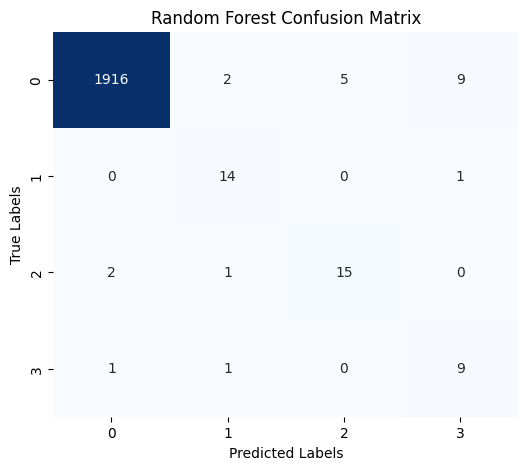

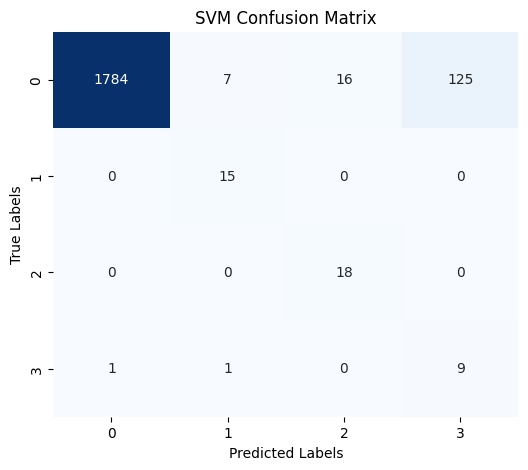

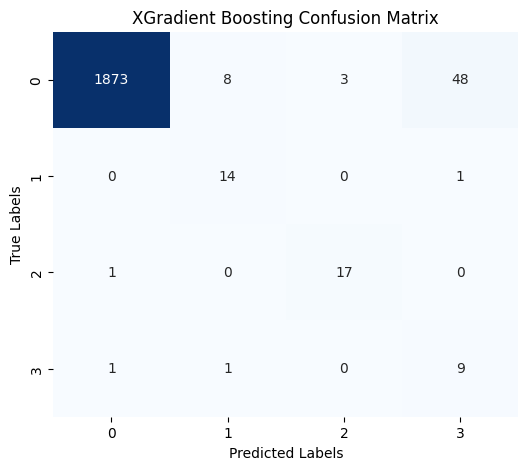

In [ ]:
# Plot Confusion Matrix untuk Random Forest dan SVM
plot_confusion_matrix(y_test_multiclass_labels, y_pred_rf, title="Random Forest Confusion Matrix")
plot_confusion_matrix(y_test_multiclass_labels, y_pred_svm, title="SVM Confusion Matrix")
plot_confusion_matrix(y_test_multiclass_labels, y_pred_xgb, title="XGradient Boosting Confusion Matrix")

Berdasarkan Confusion Matrix untuk model Random Forest diatas dapat disimpulkan:
1. Model Random Forest
  - Kelas 0 (Failure Type_HDF) memiliki kinerja yang sangat baik pada kelas 0 dengan akurasi tinggi, karena prediksi untuk kelas ini mencapai 1916 benar dari 1932 total instance (2, 5, dan 9 salah prediksi ke kelas lain). Ini menunjukkan bahwa model memiliki kemampuan yang baik untuk mengenali pola dalam kelas dominan.
  - Kelas 1 (Failure Type_OSF) memiliki 14 prediksi benar dari total 15 instance untuk kelas ini, dengan hanya 1 instance salah ke kelas lain.
  - Kelas 2 (Failure Type_PWF), dari total 18 instance, model mengklasifikasikan 15 dengan benar, meskipun terdapat kesalahan ke kelas 0 dan 1.
  - Kelas 3 (Failure Type_TWF) menunjukkan performa yang sedikit kurang optimal, karena ada 2 instance yang salah diklasifikasikan ke kelas 0 dan 1, dengan hanya 9 instance diklasifikasikan benar.

Random Forest menunjukkan performa yang stabil, terutama pada kelas dominan (kelas 0). Meski demikian, ada beberapa kesalahan dalam mengklasifikasikan kelas minoritas (kelas 2 dan 3), tetapi kesalahan ini relatif sedikit.

2. Model SVM
  - Kelas 0, memiliki performa yang baik dengan 1784 prediksi benar dari 1932 total instance. Namun, terdapat 7, 16, dan 125 instance yang salah klasifikasi ke kelas lainnya, terutama ke kelas 3, yang menunjukkan SVM kurang mampu membedakan antara kelas 0 dan kelas 3.
  - Kelas 1, terdapat 15 prediksi benar dari total 15 instance, menunjukkan kemampuan klasifikasi yang baik untuk kelas ini.
  - Kelas 2 diklasifikasikan 18 dari 18 instance dengan benar , menunjukkan keunggulan SVM dalam menangani kelas ini.
  - Kelas 3 sama seperti kelas lainnya, terdapat sedikit instance yang salah klasifikasi pada kelas 3, dengan 9 instance diklasifikasikan benar.

SVM bekerja baik secara keseluruhan, namun terdapat beberapa masalah dalam membedakan antara kelas yang mirip, terutama kelas 0 dan 3, dengan jumlah kesalahan cukup besar ke kelas 3. Meski begitu, SVM unggul dalam menangani kelas 2, di mana seluruh instance diklasifikasikan dengan benar.

3. XG Boosting
  - Kelas 0, memiliki 1873 prediksi benar dari 1932 total instance, dengan beberapa kesalahan terutama ke kelas 3 (48 instance salah klasifikasi ke kelas ini).
  - Kelas 1, terdapat 14 prediksi benar dari total 15 instance pada kelas 1, dengan hanya 1 instance salah klasifikasi, menunjukkan performa yang baik pada kelas ini.
  - Kelas 2, dari 18 instance, XGradient Boosting mengklasifikasikan 17 dengan benar, menunjukkan performa yang kuat pada kelas ini.
  - Kelas 3, XGradient Boosting juga menunjukkan performa yang baik pada kelas ini dengan 9 prediksi benar dari total instance, dengan hanya 1 instance salah klasifikasi.


XGradient Boosting menunjukkan performa yang cukup baik, dengan akurasi tinggi pada sebagian besar kelas. Namun, ada beberapa kesalahan dalam membedakan kelas 0 dan 3, serupa dengan SVM, dengan kesalahan terbesar pada kelas 0 yang salah diklasifikasikan ke kelas 3.

Berdasarkan perbandingan confusion matrix dari ketiga model, Random Forest menunjukkan performa terbaik pada kelas dominan dan memiliki distribusi kesalahan yang lebih merata pada kelas minoritas. Sementara itu, SVM dan XGradient Boosting cukup baik pada kelas 2 namun memiliki lebih banyak kesalahan pada kelas 0 dan 3.

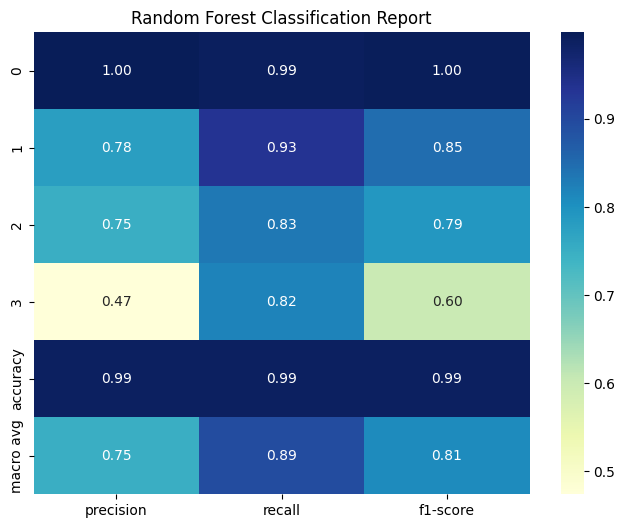

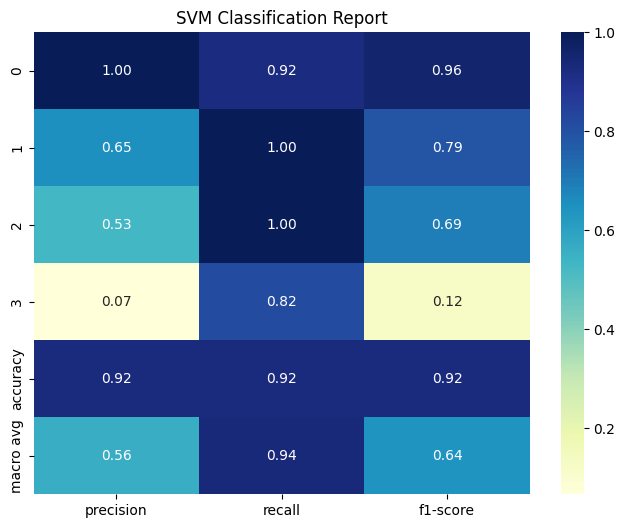

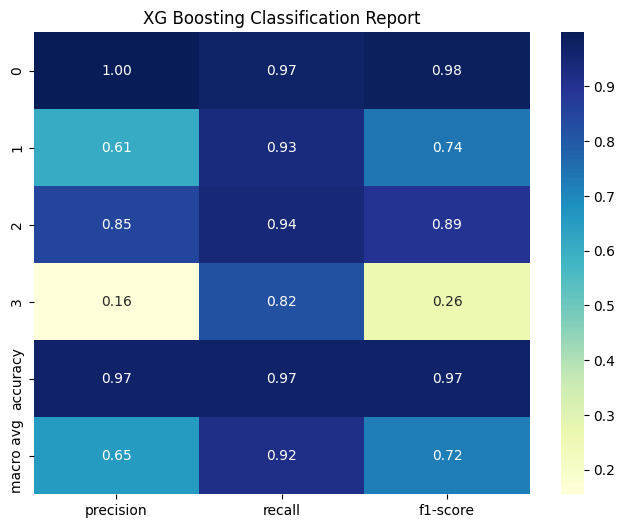

In [ ]:
# Plot Confusion Matrix dan Classification Report untuk SVM
plot_classification_report(y_test_multiclass_labels, y_pred_rf, title="Random Forest Classification Report")
plot_classification_report(y_test_multiclass_labels, y_pred_svm, title="SVM Classification Report")
plot_classification_report(y_test_multiclass_labels, y_pred_xgb, title="XG Boosting Classification Report")

Dari grafik Classification Report diatas dapat dianalisis sebagai berikut :

1. Model Random Forest
  - Model Random Forest menunjukkan performa yang sangat baik secara keseluruhan, terutama pada kelas dominan (kelas 0). Precision, recall, dan F1-score untuk kelas 0 mendekati sempurna dengan nilai masing-masing mencapai 1.00, 0.99, dan 1.00. Hal ini menunjukkan bahwa model ini sangat efektif dalam mengidentifikasi kelas dominan dengan tingkat kesalahan yang sangat rendah.
  - Untuk kelas 1, model ini menunjukkan kinerja yang cukup baik dengan recall yang tinggi (0.93), meskipun precision-nya sedikit lebih rendah di angka 0.78. Ini menunjukkan bahwa ada beberapa kesalahan false positive pada kelas ini, namun secara keseluruhan, model tetap berhasil mengidentifikasi sebagian besar sampel kelas 1 dengan benar.
  - Pada kelas 2, performa model masih cukup baik, dengan precision, recall, dan F1-score masing-masing sebesar 0.75, 0.83, dan 0.79. Namun, untuk kelas 3, performa model menurun signifikan, dengan precision yang hanya mencapai 0.47 dan F1-score 0.60, meskipun recall cukup tinggi di angka 0.82. Hal ini menunjukkan bahwa model cenderung memprediksi lebih banyak sampel sebagai kelas 3, sehingga menyebabkan banyak false positives. Secara keseluruhan, Random Forest menunjukkan performa yang kuat dan distribusi kesalahan yang cukup merata di semua kelas, meskipun kelas 3 tetap menjadi tantangan utama.

2. Model SVM
  - Model Support Vector Machine (SVM) menunjukkan karakteristik yang berbeda dibandingkan Random Forest. Pada kelas 0, model ini bekerja dengan sangat baik, dengan precision sempurna di angka 1.00, namun recall sedikit lebih rendah (0.92), menghasilkan F1-score sebesar 0.96. Artinya, SVM mampu mengidentifikasi kelas ini dengan baik, meskipun ada beberapa sampel kelas 0 yang tidak terdeteksi.
  - Untuk kelas 1, model menunjukkan recall yang sempurna (1.00), namun precision turun menjadi 0.65, menghasilkan F1-score sebesar 0.79. Ini menandakan bahwa model sering salah mengklasifikasikan sampel dari kelas lain sebagai kelas 1. Fenomena serupa terjadi pada kelas 2, di mana recall kembali mencapai 1.00, namun precision turun menjadi 0.53. Sementara itu, performa model pada kelas 3 sangat buruk, dengan precision hanya sebesar 0.07 dan F1-score yang sangat rendah di angka 0.12, meskipun recall tetap cukup tinggi di 0.82. Hal ini menunjukkan bahwa model SVM cenderung sangat fokus pada recall tetapi mengorbankan precision, terutama pada kelas minoritas seperti kelas 3.

3. Model XG Boost
  - Model XGBoost memperlihatkan performa yang hampir mendekati Random Forest pada kelas dominan (kelas 0), dengan precision yang sempurna (1.00) dan recall sebesar 0.97, menghasilkan F1-score 0.98. Pada kelas 1, XGBoost memiliki performa yang cukup baik, dengan recall sebesar 0.93 dan precision di angka 0.61, menghasilkan F1-score sebesar 0.74. Namun, precision yang rendah menunjukkan bahwa model ini sering salah mengklasifikasikan sampel dari kelas lain sebagai kelas 1.
  - Pada kelas 2, XGBoost bekerja dengan sangat baik, dengan precision 0.85, recall 0.94, dan F1-score 0.89. Namun, seperti halnya SVM, performa model menurun drastis pada kelas 3. Precision pada kelas ini hanya mencapai 0.16, sementara recall tetap cukup tinggi di angka 0.82, menghasilkan F1-score yang rendah sebesar 0.26. Hal ini menunjukkan bahwa model cenderung membuat banyak kesalahan false positive saat memprediksi kelas 3.


Dari analisis classification report, Random Forest muncul sebagai model dengan performa terbaik secara keseluruhan. Model ini unggul dalam menangani kelas dominan dan juga memiliki distribusi kesalahan yang lebih merata dibandingkan SVM dan XGBoost. Sementara itu, SVM dan XGBoost memiliki kelemahan signifikan dalam precision, terutama pada kelas minoritas seperti kelas 3. Namun, SVM memiliki keunggulan dalam recall, membuatnya cocok untuk aplikasi yang membutuhkan sensitivitas tinggi, seperti mendeteksi kejadian jarang. XGBoost, di sisi lain, menunjukkan performa yang sangat baik pada kelas dominan dan cukup kuat pada kelas 2, namun kesulitan dalam menangani kelas 3.

## Conclusion

Berdasarkan analisis hasil dari confusion matrix dan classification report dari ketiga model multiklasifikasi yakni model Random Forest, SVM dan XG Boost. Model Random Forest dipilih sebagai model terbaik untuk tugas analisis prediktif kegagalan mesin ini. Berikut adalah alasan pemilihan model Random Forest:

1. Random Forest menunjukkan performa yang hampir sempurna pada kelas dominan (kelas 0), dengan precision, recall, dan F1-score yang mendekati nilai 1.0. Hal ini sangat penting mengingat kelas dominan memiliki jumlah sampel yang paling banyak dalam dataset, sehingga kinerja yang kuat pada kelas ini menunjukkan bahwa model mampu menangani mayoritas data secara andal.

2. Dibandingkan model lain, Random Forest memiliki kemampuan untuk mendeteksi kelas minoritas dengan tingkat kesalahan yang lebih merata. Meskipun F1-score pada kelas minoritas masih lebih rendah dibandingkan kelas dominan, model ini menunjukkan performa yang lebih stabil dalam mendeteksi kegagalan dengan frekuensi rendah. Hal ini menjadi nilai tambah karena kelas minoritas sering kali lebih sulit untuk diprediksi dalam data yang tidak seimbang.

3. Dengan menerapkan teknik SMOTE untuk mengatasi ketidakseimbangan kelas, performa model Random Forest berhasil ditingkatkan, terutama dalam mendeteksi kelas kegagalan dengan frekuensi rendah. Ini terlihat dari peningkatan nilai recall pada kelas minoritas, yang menunjukkan bahwa model berhasil menangkap lebih banyak instance kegagalan yang sebelumnya mungkin terabaikan.

4. Dari segi metrik rata-rata (macro average), Random Forest memiliki nilai precision, recall, dan F1-score yang lebih tinggi dibandingkan SVM dan XGBoost. Hal ini menunjukkan bahwa model ini mampu memberikan prediksi yang lebih konsisten di semua kelas, baik dominan maupun minoritas.


Kesimpulannya, model Random Forest dipilih karena memiliki kombinasi keandalan pada kelas dominan, stabilitas prediksi pada kelas minoritas, dan kinerja keseluruhan yang lebih unggul. Meskipun masih ada ruang untuk perbaikan, model ini sudah cukup baik untuk digunakan dalam tugas analisis prediktif kegagalan mesin, terutama untuk mendukung pengambilan keputusan berbasis data dalam pengelolaan operasional mesin.